In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from celluloid import Camera
import matplotlib.cm as cm

## Inspired by
## http://thevisualroom.com/non_linear_convection.html

In [40]:
def convection(nt, nx, delta_x, c):
    # Calculated params
    omega = 0.2

    # Initialise data structures
    u = np.zeros((nx,nt))
    x = np.zeros(nx)

    # Boundary conditions
    #u[0,:] = u[nx-1,:] = 0

    # Initial conditions
    for i in range(0,nx):
        #u[i,0] = 0#np.cos(omega*i*180/(nx*np.pi))
        if i < nx/4:
            u[i,0] = 2
        else:
            u[i,0] = 1
            
    for i in range(0,nx):
        x[i] = i*delta_x
        
    return u, x

def plot_convection(u_k,k):
    """
    Plots the 1D velocity field
    """
    plt.clf()
    plt.plot(x,u_k,'r')
    plt.xlabel('x (m)')
    plt.ylabel('u (m/s)')
    plt.ylim([np.amin(u)-0.1*abs(np.amax(u)),1.1*np.amax(u)])
    plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
    return plt

def plot_convection2(u,k,i,x):
    plt.plot(x,u[:,k],color=colorwave[i])
    plt.xlabel('x (m)')
    plt.ylabel('u (m/s)')
    plt.ylim([np.amin(u)-0.1,np.amax(u)+0.1])
    #plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
    
def animate(k):
    plot_convection(u[:,k], k)

Equation:

## $$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x}=0
$$

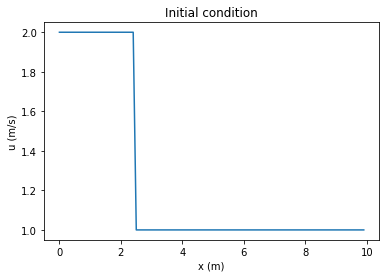

In [41]:
name = '2 Inviscid Burgers Equation'
nx = 100
nt = 1000
c = 1
alpha = 0.5
delta_x = 0.1
delta_t = (delta_x ** 2)/(4 * alpha)

u,x = convection(nt,nx,delta_x,c)
        
plt.plot(x,u[:,0])
plt.xlabel('x (m)')
plt.ylabel('u (m/s)')
plt.title('Initial condition')
plt.show()

In [42]:
def calculate(u):
    omega = 0.01
    for k in range(0,nt-1):
        u[0,k+1] = 2#np.sin(omega*k*180/(nx*np.pi))
        for i in range(1,nx):
            u[i,k+1] = u[i,k]-u[i,k]*(delta_t/delta_x)*(u[i,k]-u[i-1,k])
        #u[0,k+1] = u[1,k+1]
    return u

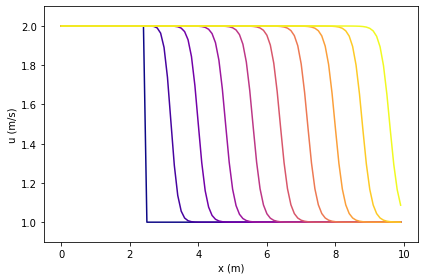

In [44]:
length = 10
unew,xnew = convection(nt,nx,delta_x,c)
unew = calculate(unew)
karray = np.linspace(0,nt-1,length)
colorwave = cm.plasma(np.linspace(0, 1, length))
for i in range(length):
    k = int(karray[i])
    plot_convection2(unew,k,i,xnew)
plt.tight_layout()
plt.savefig(str(name)+'.svg', format='svg')
plt.show()

Done!


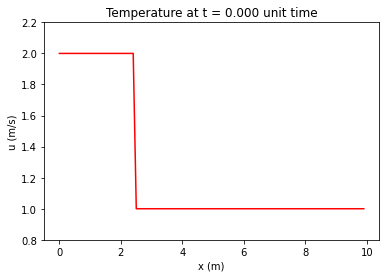

In [45]:
# Do the calculation here
u = calculate(u)
   
anim = animation.FuncAnimation(plt.figure(), animate, interval=10, frames=nt, repeat=False)
#anim.save("heat_equation_solution.mp4", writer="PillowWriter", fps=2)
anim.save(str(name)+".mp4")

print("Done!")